In [21]:
import pandas as pd # impoting pandas
data = {
     "Month" : ['Jan','Feb','Mar','Apr','May','Jun'],
     "Sales" :[10000,12000,15000,14000,17000,16000],
     "Profit" : [2000,3000,4000,2500,3500,3000],
}
df = pd.DataFrame(data) # df=DataFrame
print(df)

  Month  Sales  Profit
0   Jan  10000    2000
1   Feb  12000    3000
2   Mar  15000    4000
3   Apr  14000    2500
4   May  17000    3500
5   Jun  16000    3000


In [22]:
df['Month']

0    Jan
1    Feb
2    Mar
3    Apr
4    May
5    Jun
Name: Month, dtype: object

# 1.LINE PLOT MONTHLY SALES 

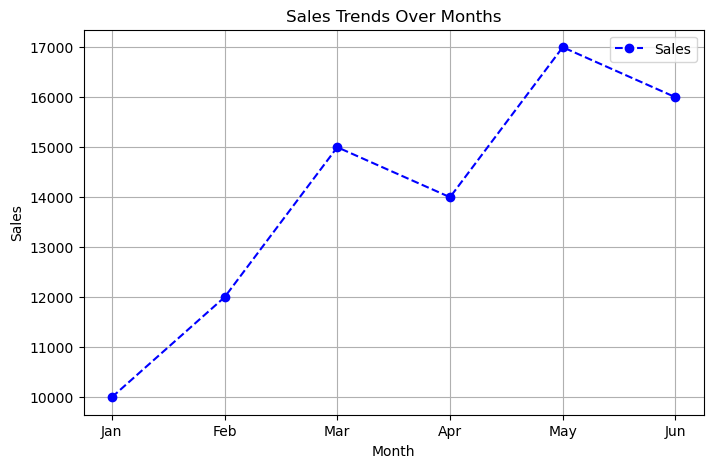

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))# 8 is width,5 is height
plt.plot(df['Month'],df['Sales'],color='blue',marker='o',linestyle='--',label='Sales')
plt.title('Sales Trends Over Months')
plt.xlabel('Month') # month putting in x-axis
plt.ylabel('Sales')# sales in y-axis
plt.grid(True) #in grid it will come if u keep true
plt.legend()
plt.show()

# 2.BAR PLOT MONTH VS PROFIT

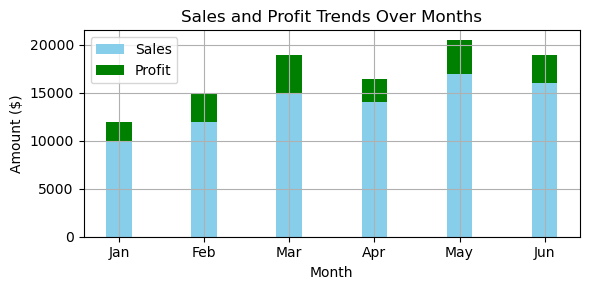

In [30]:
plt.figure(figsize=(6,3))
width = 0.3
plt.bar(df['Month'],df['Sales'],width=width,color='skyblue',label='Sales')
plt.bar(df['Month'],df['Profit'],width=width,color='green',label='Profit',bottom=df['Sales'])
plt.title('Sales and Profit Trends Over Months')
plt.xlabel('Month') # month putting in x-axis
plt.ylabel('Amount ($)')# sales in y-axis
plt.grid(True) #in grid it will come if u keep true
plt.legend()#legend() function is used to display a label box on the graph that explains what each line, color, or marker means.
plt.tight_layout()
plt.show()

# 3.PIE CHART VS MONTH

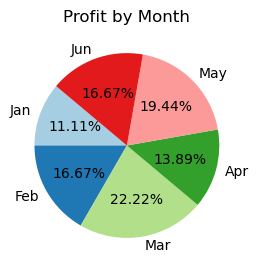

In [35]:
from enum import auto
plt.figure(figsize=(6,3))
plt.pie(df['Profit'],labels=df['Month'], autopct='%1.2f%%',startangle=140,colors=plt.cm.Paired.colors)#autopct gives sizes to graph
plt.title('Profit by Month')
plt.show()

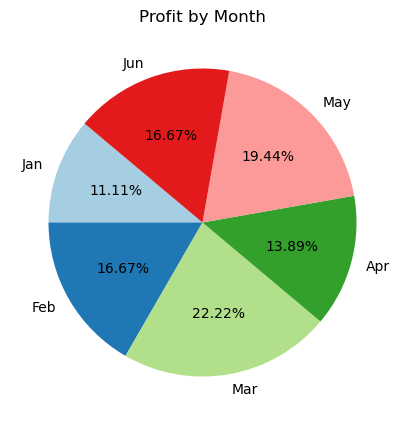

In [37]:
from enum import auto
plt.figure(figsize=(10,5)) #size incresed
plt.pie(df['Profit'],labels=df['Month'], autopct='%1.2f%%',startangle=140,colors=plt.cm.Paired.colors)#autopct gives sizes to graph
plt.title('Profit by Month')
plt.show()

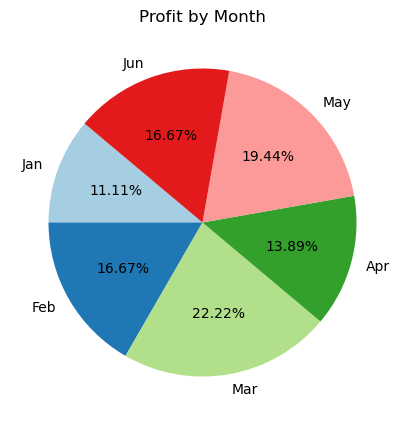

In [40]:
import matplotlib.pyplot as plt #OR we can use this matplotlib library
plt.figure(figsize=(10,5))
plt.pie(df['Profit'],labels=df['Month'], autopct='%1.2f%%',startangle=140,colors=plt.cm.Paired.colors)#autopct gives sizes to graph
plt.title('Profit by Month')
plt.show()

## 4.Scatter plot

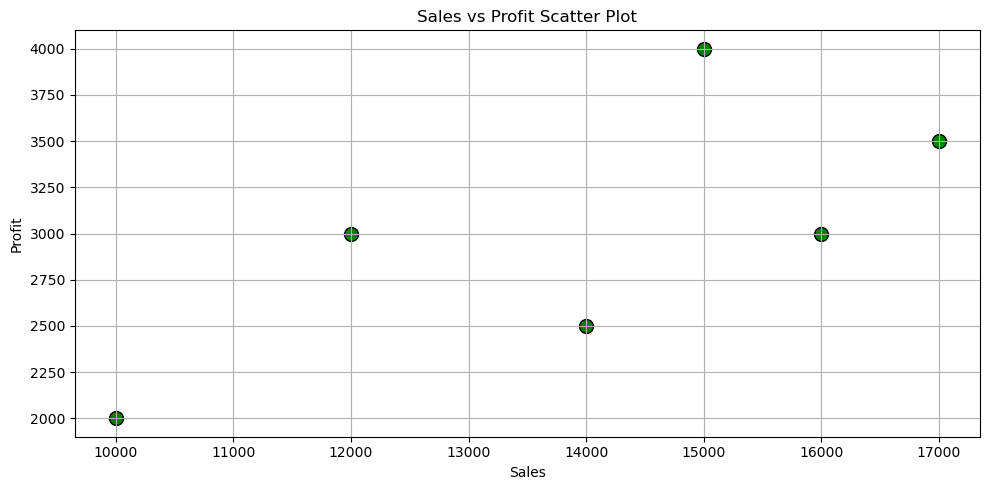

In [43]:
plt.figure(figsize=(10,5))
plt.scatter(df['Sales'],df['Profit'],color='green',s=100, edgecolors='black')
plt.title('Sales vs Profit Scatter Plot')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.tight_layout()
plt.grid(True)
plt.show()

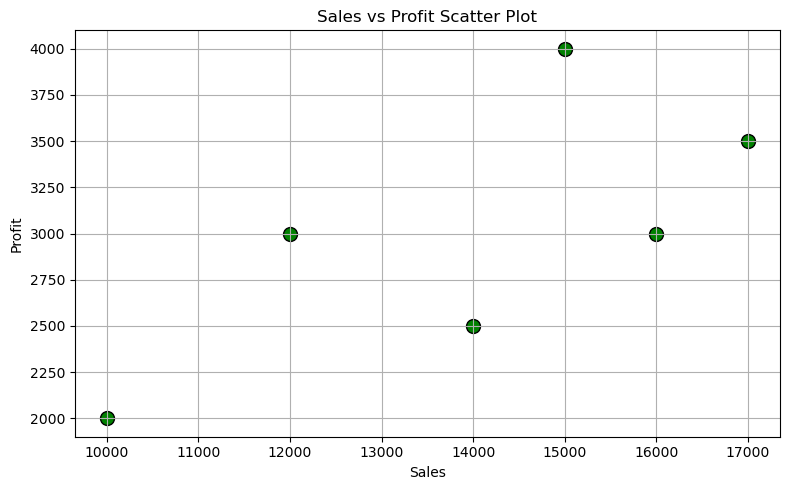

(None,)

In [46]:
plt.figure(figsize=(8,5)),#size changed
plt.scatter(df['Sales'],df['Profit'],color='green',s=100, edgecolors='black'),
plt.title('Sales vs Profit Scatter Plot'),
plt.xlabel('Sales'),
plt.ylabel('Profit'),
plt.tight_layout(),
plt.grid(True),
plt.show(),

# 5.HISTOGRAM

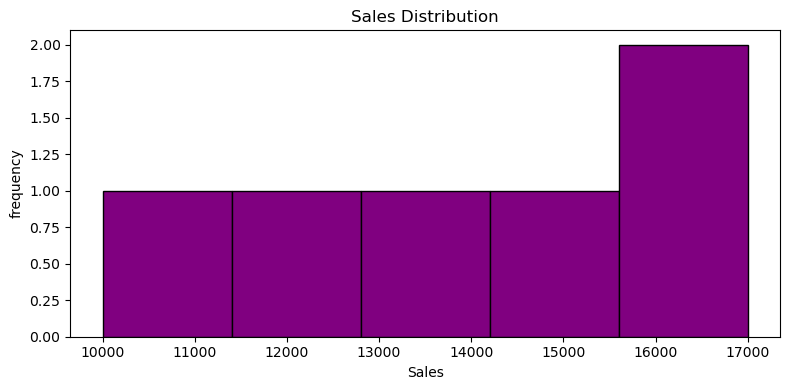

In [48]:
plt.figure(figsize=(8,4)),
plt.hist(df['Sales'], bins=5,color='purple',edgecolor='black'),
plt.title('Sales Distribution'),
plt.xlabel('Sales')
plt.ylabel('frequency')
plt.tight_layout(),
plt.show()

# BOX PLOT

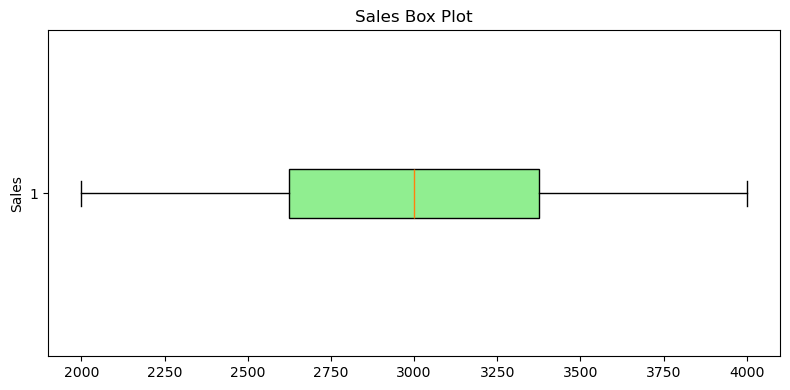

In [50]:
plt.figure(figsize=(8,4)),
plt.boxplot(df['Profit'],vert=False,patch_artist=True,boxprops=dict(facecolor='lightgreen')),
plt.title('Sales Box Plot')
plt.ylabel('Sales')
plt.tight_layout(),
plt.show()#univarient,orange line is avg sales

In [55]:
!pip install gradio

In [ ]:
# !pip install gradio

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import gradio as gr

# Sample Data
data = {
    "Month": ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
    "Sales": [10000, 12000, 15000, 14000, 17000, 16000],
    "Profit": [2000, 3000, 4000, 2500, 3500, 3000],
}
df = pd.DataFrame(data)

# Plotting Function
def generate_plot(plot_type):
    fig = plt.figure(figsize=(8, 5))

    if plot_type == 'Line Plot':
        plt.plot(df['Month'], df['Sales'], color='blue', marker='o', linestyle='--', label='Sales')
        plt.title('Sales Trends Over Months')
        plt.xlabel('Month')
        plt.ylabel('Sales ($)')
        plt.grid(True)
        plt.legend()

    elif plot_type == 'Stacked Bar Chart':
        fig.set_size_inches(10, 6)
        width = 0.3
        plt.bar(df['Month'], df['Sales'], width=width, color='skyblue', label='Sales')
        plt.bar(df['Month'], df['Profit'], width=width, color='green', label='Profit', bottom=df['Sales'])
        plt.title('Sales and Profit Trends Over Months')
        plt.xlabel('Month')
        plt.ylabel('Amount ($)')
        plt.grid(True)
        plt.legend()

    elif plot_type == 'Pie Chart':
        fig.set_size_inches(7, 7)
        plt.pie(df['Profit'], labels=df['Month'], autopct='%1.2f%%', startangle=140, colors=plt.cm.Paired.colors)
        plt.title('Profit by Month')

    elif plot_type == 'Scatter Plot':
        plt.scatter(df['Sales'], df['Profit'], color='red')
        plt.title('Profit vs Sales')
        plt.xlabel('Sales ($)')
        plt.ylabel('Profit ($)')
        plt.grid(True)

    elif plot_type == 'Histogram':
        plt.hist(df['Sales'], bins=5, color='purple')
        plt.title('Sales Histogram')
        plt.xlabel('Sales')
        plt.ylabel('Frequency')
        plt.grid(True)

    elif plot_type == 'Box Plot':
        plt.boxplot([df['Sales'], df['Profit']], labels=['Sales', 'Profit'])
        plt.title('Box Plot: Sales vs Profit')
        plt.grid(True)

    return fig

# Gradio Interface
demo = gr.Interface(
    fn=generate_plot,
    inputs=gr.Radio(
        ['Line Plot', 'Stacked Bar Chart', 'Pie Chart', 'Scatter Plot', 'Histogram', 'Box Plot'],
        label="Choose Plot Type"
    ),
    outputs=gr.Plot(label="Sales Data Visualization"),
    title='Sales & Profit Visual Insight',
    description="Choose a chart type to visualize the data"
)

demo.launch()


* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.
